In [1]:
%load_ext autoreload
%autoreload 2

In [285]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [286]:
datalist = ['anemones', 'bronzefilter', 'longleaf', 'spruces', 'waka']
p = 'Your Own Path'
xy_data_paths = [p + i + '.csv' for i in datalist]
data_n = [ 'london', 'melbourne', 'newyork', 'paris', 'beijing', 'perth', 'seattle', 'dubai' ]

rst = {i :{} for i in data_n}
rst.update({i + '_coords': {} for i in data_n})
rst.update({i + '_coords': {} for i in datalist})
result_save_p = './Results/'

In [287]:
for l in rst.keys():
    try:
        with open(result_save_p + l + '_performance.pkl', 'rb') as file:
            rst[l] = pickle.load(file)
    except:
        pass

In [288]:
df = {
    'data_name' : [],
    'model' : [], 
    'rmse' : [], 
    'time' : [], 
    'nr.hyperparameters' : [],
    'nr.train' : [],
    'nr.df' : []
      }
for k, r in rst.items():
    if len(r) != 0 :
      for m, p in r[k].items():
        (_, _, rmse, _, t, search_num, train_size, data_size) = p
        df['data_name'].append(k)
        df['model'].append(m)
        df['rmse'].append(rmse)
        df['time'].append(t)
        df['nr.hyperparameters'].append(search_num)
        df['nr.train'].append(train_size)
        df['nr.df'].append(data_size)


In [289]:

rst_df = pd.DataFrame.from_records(df)
rst_df['per_train_time'] = rst_df['time']/rst_df['nr.hyperparameters']
rst_df = rst_df.round({'per_train_time': 3,
                       'rmse': 4})

In [290]:
rst_df['model'] = rst_df['model'].map({'Lr_ridge' : "Ridge LR",
        'SVM' : "SVM",
        'GWR' : "GWR",
        'Kriging' :'Kriging',
        "Kriging_LGBMRegressor": "Kriging LGBM", 
        "Guassian":'Guassian P', 
        'XGBoost' : "XGBoost", 
        'CatBoost' :"CatBoost",
        "TweedieRegressor": "Tweedie", 
        "RandomForest": "RMF", 
        "LightGBM": "LGBM", 
        "TabPFNRegressor": "TabPFN" 
        })

In [291]:
df = pd.DataFrame(rst_df)
pivot = df.pivot(index='data_name', columns='model', values='rmse')
min_rmse = pivot.min(axis=1)
# Mark the minimum RMSE value in each row
pivot_highlighted = pivot.apply(lambda row: [
    f"*{val}*" if val == min_rmse[row.name] else val for val in row], axis=1)
# Convert back to DataFrame for better display
result = pd.DataFrame(pivot_highlighted.tolist(), columns=pivot.columns, index=pivot.index).reset_index()
# Desired column order
desired_order = ['data_name', 'Ridge LR', 'SVM', 'GWR', 'Kriging', 'Kriging LGBM',
                 'Guassian P', 'Tweedie', 'RMF', 'LGBM', 'XGBoost', 'CatBoost', 'TabPFN']
# Reorder columns based on the desired order
rmse_table = result[[col for col in desired_order if col in result.columns] +
                        [col for col in result.columns if col not in desired_order]]
rmse_table.columns.name = None

In [292]:
result_coords = rmse_table[rmse_table['data_name'].str.contains('_coords')]
result_all = rmse_table[~rmse_table['data_name'].str.contains('_coords')]

In [293]:
result_coords

,data_name,Ridge LR,SVM,GWR,Kriging,Kriging LGBM,Guassian P,Tweedie,RMF,LGBM,XGBoost,CatBoost,TabPFN
0,anemones_coords,0.1756,0.1870,0.1841,0.1826,0.1826,0.1804,0.1755,0.1753,*0.1747*,0.1779,0.1766,0.181
2,beijing_coords,0.1833,0.1342,0.1390,0.1284,0.1284,0.138,0.1833,0.1296,0.1279,0.1279,0.1273,*0.1272*
3,bronzefilter_coords,0.1736,0.2364,0.2133,0.1835,0.1835,0.1754,0.1622,0.1553,0.1623,0.1615,0.1795,*0.1535*
5,dubai_coords,0.1941,0.1584,0.1668,*0.1373*,*0.1373*,0.1539,0.1911,0.1384,0.1448,0.1413,0.1404,0.1391
7,london_coords,0.0885,0.0717,0.0676,*0.0641*,*0.0641*,0.0704,0.0885,0.0643,0.065,0.0652,0.0667,0.0653
8,longleaf_coords,0.3114,0.2978,0.2546,0.275,0.275,0.2923,0.2531,0.2641,0.2798,0.2639,0.3037,*0.2451*
10,melbourne_coords,0.0944,0.0708,0.0751,0.0603,0.0602,0.0652,0.0922,0.0608,0.061,0.0599,0.0599,*0.0588*
12,newyork_coords,0.1104,0.1018,0.0955,0.0964,0.0964,0.0981,0.1104,0.0928,0.0931,0.093,0.0939,*0.0925*
14,paris_coords,0.0216,0.0615,0.0208,0.0213,0.0213,0.0217,0.0216,0.0205,0.0203,0.0203,0.0203,*0.0202*
16,perth_coords,0.0555,0.0444,0.0350,0.0348,0.0348,0.0384,0.0548,*0.0339*,0.034,0.0341,0.0344,0.034


In [294]:
result_all

,data_name,Ridge LR,SVM,GWR,Kriging,Kriging LGBM,Guassian P,Tweedie,RMF,LGBM,XGBoost,CatBoost,TabPFN
1,beijing,0.1718,0.1378,0.1329,0.1284,0.1285,0.1608,0.1693,0.1031,*0.1003*,0.1045,0.1036,0.1008
4,dubai,0.1801,0.1982,0.1852,0.1373,0.1303,0.1982,0.1905,0.1194,0.1202,0.1201,0.1122,*0.1038*
6,london,0.0846,0.0757,0.0859,0.0641,0.0628,0.0776,0.0846,0.0589,0.0586,0.0588,0.0602,*0.0562*
9,melbourne,0.0803,0.0702,0.0673,0.0603,0.0389,0.0687,0.0581,0.0326,0.0296,0.0313,0.0291,*0.0263*
11,newyork,0.0863,0.0759,0.0721,0.0822,0.0726,0.0751,0.1002,0.0565,0.0562,0.056,0.0561,*0.0532*
13,paris,0.0213,0.0246,0.0206,0.0213,0.0213,0.0217,0.0214,0.0202,0.0202,*0.0201*,*0.0201*,*0.0201*
15,perth,0.0494,0.0460,0.0355,0.0348,0.0324,0.0375,0.0489,*0.027*,0.0277,0.0274,0.0282,0.0275
17,seattle,0.1252,0.1100,0.0966,0.1101,0.0981,0.1134,0.1253,0.0838,0.082,0.0836,0.0831,*0.079*


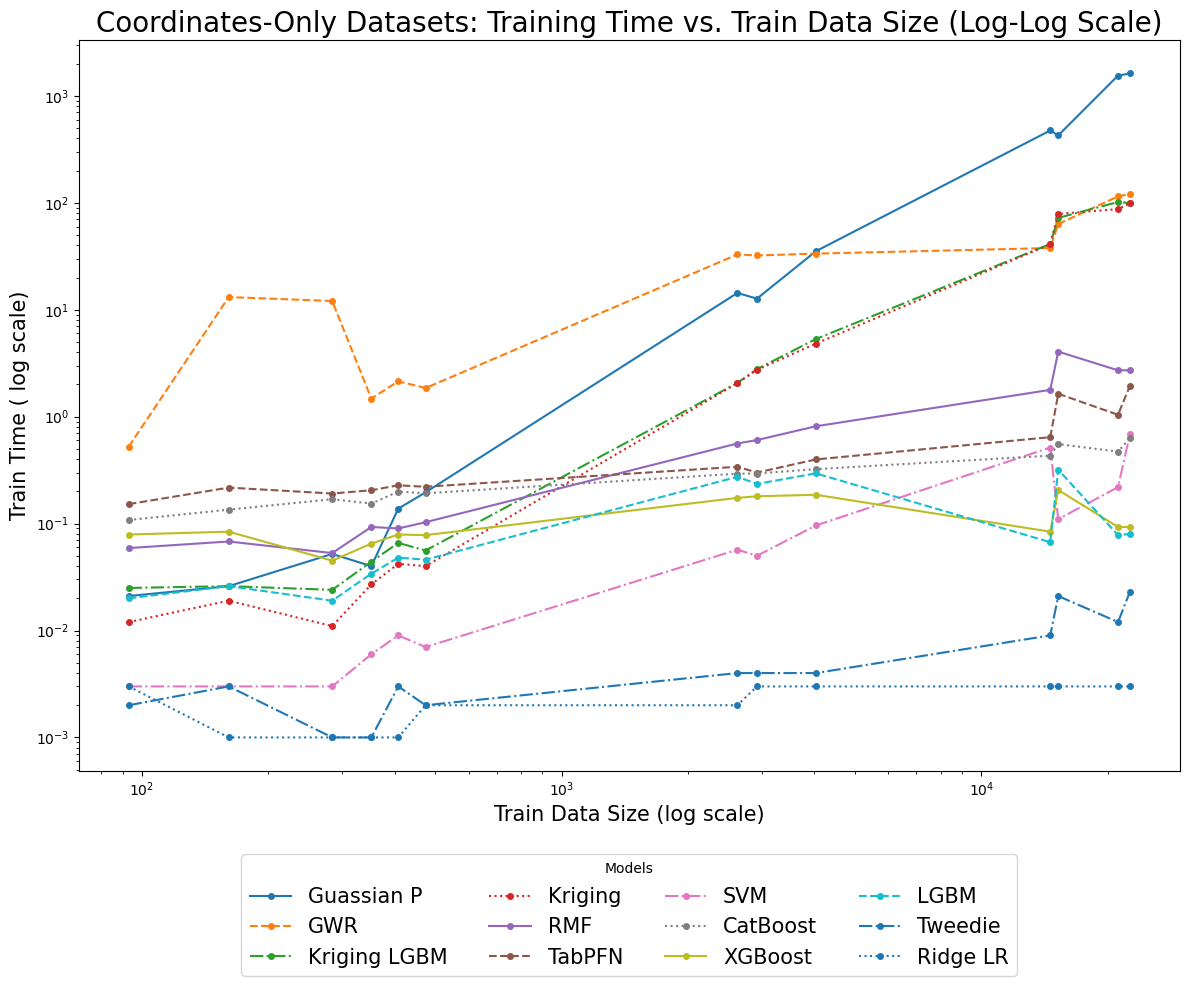

In [297]:
df_plot = rst_df[rst_df['data_name'].str.contains('_coords')].sort_values(by= ['model', 'nr.train'])
# Define distinct line styles
line_styles = ['-', '--', '-.', ':']
colors = sns.color_palette("tab10", n_colors=11)  # Use 11 distinct colors

# Extract the models and their last point's `per_train_time`
model_last_values = {}
for model in df_plot['model'].unique():
    model_data = df_plot[df_plot['model'] == model]
    model_last_values[model] = model_data['per_train_time'].iloc[-1]
# Sort models by their last point's value
sorted_models = sorted(model_last_values, key=model_last_values.get, reverse=True)
plt.figure(figsize=(12, 10))

# Draw each model line with a unique style and color
for i, model in enumerate(sorted_models):  # Use sorted model order
    model_data = df_plot[df_plot['model'] == model]
    plt.plot(model_data['nr.train'], model_data['per_train_time'],
             label=model, 
             color=colors[i % len(colors)],  # Cycle through colors
             linestyle=line_styles[i % len(line_styles)],  # Cycle through styles
             marker='o', 
             markersize = 4
            )

# Use a log scale for both axes and add labels 
plt.xscale('log')
plt.yscale('log')
plt.title('Coordinates-Only Datasets: Training Time vs. Train Data Size (Log-Log Scale)', fontsize=20)
plt.xlabel('Train Data Size (log scale)', fontsize=15)
plt.ylabel('Train Time ( log scale)', fontsize=15)
# Add a legend outside the plot, sorted by last point values
plt.legend(title="Models", bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize=15, ncol=4)
# Adjust layout to make space for the legend at the bottom
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.show()


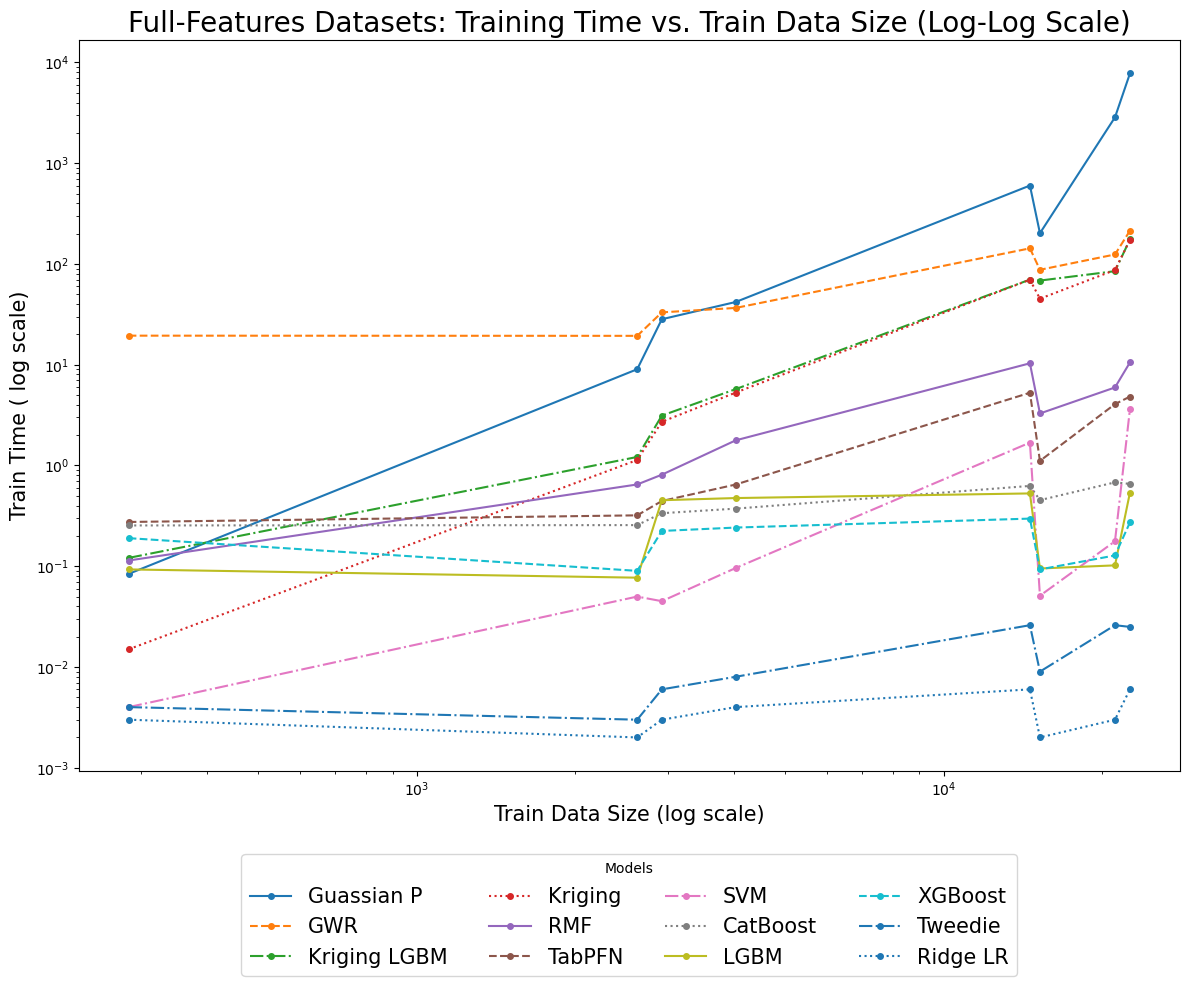

In [298]:
df_plot = rst_df[~rst_df['data_name'].str.contains('_coords')].sort_values(by= ['model', 'nr.train'])
# Define distinct line styles
line_styles = ['-', '--', '-.', ':']
colors = sns.color_palette("tab10", n_colors=11) 
model_last_values = {}
for model in df_plot['model'].unique():
    model_data = df_plot[df_plot['model'] == model]
    model_last_values[model] = model_data['per_train_time'].iloc[-1]
sorted_models = sorted(model_last_values, key=model_last_values.get, reverse=True)
plt.figure(figsize=(12, 10))

for i, model in enumerate(sorted_models):  # Use sorted model order
    model_data = df_plot[df_plot['model'] == model]
    plt.plot(model_data['nr.train'], model_data['per_train_time'],
             label=model, 
             color=colors[i % len(colors)],  # Cycle through colors
             linestyle=line_styles[i % len(line_styles)],  # Cycle through styles
             marker='o', 
             markersize = 4
            )

# Use a log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.title('Full-Features Datasets: Training Time vs. Train Data Size (Log-Log Scale)', fontsize=20)
plt.xlabel('Train Data Size (log scale)', fontsize=15)
plt.ylabel('Train Time ( log scale)', fontsize=15)
plt.legend(title="Models", bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize=15, ncol=4)  # 2 columns (splitting models into rows)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()
